<a href="https://colab.research.google.com/github/Musu1/Deep-Learning/blob/master/Large_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [59]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# Datasets,transforms and visualisation

In [0]:
transform_train=transforms.Compose([transforms.RandomResizedCrop(224),  # Change the size of image to 224x224
                                  transforms.ToTensor(),               # Converting it to tensor
                                  transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]) # Normalizing the image ,first one is mean and second one is standard deviation

transform_test=transforms.Compose([transforms.RandomResizedCrop(224),
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [61]:
trainset=torchvision.datasets.CIFAR10(root='./data',download=True,train=True,transform=transform_train)
testset=torchvision.datasets.CIFAR10(root='./data',download=True,train=False,transform=transform_test)

num_classes=10

batch_size=4

Files already downloaded and verified
Files already downloaded and verified


In [0]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)

In [63]:
dataiter=iter(trainloader)
images,labels=dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 224, 224])
torch.Size([3, 224, 224])
4


In [0]:
def imshow(img,title):
  npimg=img.numpy()*0.5+0.5 # Converting from tensor to numpy and then unnormalize it by multiplying to standard devistion and adding mean
  plt.figure(figsize=(batch_size,1))
  plt.axis('off')
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.title(title)
  plt.show()

In [0]:
def show_batch_images(dataloader):
  images,lables=next(iter(dataloader))
  img=torchvision.utils.make_grid(images)
  imshow(img,title=[str(x.item()) for x in labels])

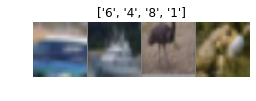

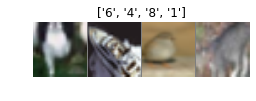

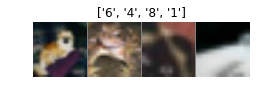

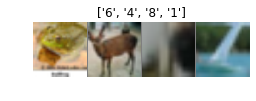

In [66]:
for i in range(4):
  show_batch_images(trainloader)

# Creating VGG-16

https://pytorch.org/docs/stable/_modules/torchvision/models/vgg.html


In [0]:
# We will be using already defined VGG models which can be seen in above link
# It is in models form torchvision so import it

from torchvision import models

In [0]:
vgg=models.vgg16_bn()
# So in the above definition their are different models with different layers of VGG net I am using vgg16_bn

In [69]:
# Now to see the layers and all the functionalities used in our model we can print and see
print(vgg)
# From output we can see first we have convolutional layers then avg pooling and finally fully connected network and then are under categories
#features,avg poool,classifiers respectively

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [70]:
print(vgg.features[0])
# First layer of the convolutional layer and similarly we can print layers as well

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [71]:
print(vgg.classifier[6])
# Lat layer of the fully connected layer

Linear(in_features=4096, out_features=1000, bias=True)


In [72]:
# Now we need to make change in above model because we just have 10 output classes and the model has 1000 output classes which can be see from above code's output
# So we can't just change the output feature to 10 because weights are already assigned according to 1000 layers so we need to change from core
final_in_features=vgg.classifier[6].in_features # We put all the features 
mod_classifier=list(vgg.classifier.children())[:-1] # Now removing the last layer
mod_classifier.extend([nn.Linear(final_in_features,num_classes)]) # Then again adding the last layer and linear fxn also defines the weight here only
print(mod_classifier) # out_features are 10 now

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=10, bias=True)]


In [73]:
vgg.classifier=nn.Sequential(*mod_classifier)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

# Train CIFAR10

In [0]:
# For training we are taking large batches
batch_size=16

trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=False)

In [0]:
def evaluation(dataloader,model):
  total,correct=0,0
  for data in dataloader:
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    outputs=model(inputs)
    _,pred=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(pred==labels).sum().item()
  return 100*correct/total
    

In [0]:
vgg=vgg.to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(vgg.parameters(),lr=0.05)

Iteration:0/3125 ,Loss=2.77
Iteration:100/3125 ,Loss=14.93
Iteration:200/3125 ,Loss=2.38
Iteration:300/3125 ,Loss=2.20
Iteration:400/3125 ,Loss=2.35
Iteration:500/3125 ,Loss=2.31
Iteration:600/3125 ,Loss=2.30
Iteration:700/3125 ,Loss=2.46
Iteration:800/3125 ,Loss=2.33
Iteration:900/3125 ,Loss=2.35
Iteration:1000/3125 ,Loss=2.27
Iteration:1100/3125 ,Loss=2.39
Iteration:1200/3125 ,Loss=2.14
Iteration:1300/3125 ,Loss=2.38
Iteration:1400/3125 ,Loss=2.31
Iteration:1500/3125 ,Loss=2.32
Iteration:1600/3125 ,Loss=2.59
Iteration:1700/3125 ,Loss=2.22
Iteration:1800/3125 ,Loss=2.29
Iteration:1900/3125 ,Loss=2.28
Iteration:2000/3125 ,Loss=2.22
Iteration:2100/3125 ,Loss=2.12
Iteration:2200/3125 ,Loss=2.28
Iteration:2300/3125 ,Loss=2.51
Iteration:2400/3125 ,Loss=2.20
Iteration:2500/3125 ,Loss=2.12
Iteration:2600/3125 ,Loss=1.98
Iteration:2700/3125 ,Loss=2.30
Iteration:2800/3125 ,Loss=2.28
Iteration:2900/3125 ,Loss=2.20
Iteration:3000/3125 ,Loss=1.98
Iteration:3100/3125 ,Loss=2.01
Epoch:0/1 Test accu

<function matplotlib.pyplot.show>

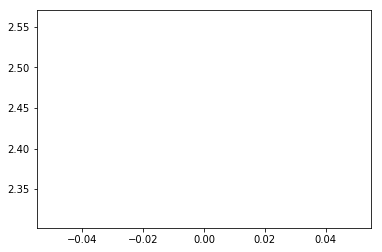

In [77]:
loss_epoch_arr = []
max_epochs=1

n_iters=np.ceil(50000/batch_size)

for epoch in range(max_epochs):
  for i,data in enumerate(trainloader,0):
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    
    opt.zero_grad()
    
    outputs=vgg(inputs)
    loss=loss_fn(outputs,labels)
    loss.backward()
    opt.step()
    
    del inputs,labels,outputs
    torch.cuda.empty_cache()
    
    if i%100 == 0:
      print('Iteration:%d/%d ,Loss=%0.2f'%(i,n_iters,loss.item()))
    
  loss_epoch_arr.append(loss.item())
  print('Epoch:%d/%d Test accuracy=%0.2f Train accuracy=%0.2f'%(epoch,max_epochs,evaluation(testloader,vgg),evaluation(trainloader,vgg)))
  
plt.plot(loss_epoch_arr)
plt.show

# Freeze layers of convolution operation

In [0]:
# Now we have seen that above method doesn't give good accuracy as loss doesn't change much. So we can use pretrained models. Here I will be using VGG model pretrained 
# on imageNet model.
batch_size=16
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=False)

In [0]:
vgg=models.vgg16_bn(pretrained=True)

In [80]:
# Now we need to make change in above model because we just have 10 output classes and the model has 1000 output classes which can be see from above code's output
# So we can't just change the output feature to 10 because weights are already assigned according to 1000 layers so we need to change from core
final_in_features=vgg.classifier[6].in_features # We put all the features 
mod_classifier=list(vgg.classifier.children())[:-1] # Now removing the last layer
mod_classifier.extend([nn.Linear(final_in_features,num_classes)]) # Then again adding the last layer and linear fxn also defines the weight here only
print(mod_classifier) # out_features are 10 now

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=10, bias=True)]


In [81]:
vgg.classifier=nn.Sequential(*mod_classifier)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [0]:
for param in vgg.features.parameters():
  param.requires_grad=False
# By this we are freezing all the parameters that is not training because we are using pretained parameters we do not want to train all of them just some of them

In [0]:
final_in_features=vgg.classifier[6].in_features
vgg.classifier[6]=nn.Linear(final_in_features,num_classes)

In [0]:
vgg=vgg.to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(vgg.parameters(),lr=0.05)

In [85]:
for param in vgg.parameters():
  if param.requires_grad:
    print(param.shape)

torch.Size([4096, 25088])
torch.Size([4096])
torch.Size([4096, 4096])
torch.Size([4096])
torch.Size([10, 4096])
torch.Size([10])


Iteration:0/3125 ,Loss=1.21
Iteration:100/3125 ,Loss=0.96
Iteration:200/3125 ,Loss=1.55
Iteration:300/3125 ,Loss=0.99
Iteration:400/3125 ,Loss=1.33
Iteration:500/3125 ,Loss=1.30
Iteration:600/3125 ,Loss=1.21
Iteration:700/3125 ,Loss=1.16
Iteration:800/3125 ,Loss=1.17
Iteration:900/3125 ,Loss=1.03
Iteration:1000/3125 ,Loss=1.24
Iteration:1100/3125 ,Loss=1.25
Iteration:1200/3125 ,Loss=1.65
Iteration:1300/3125 ,Loss=1.16
Iteration:1400/3125 ,Loss=1.38
Iteration:1500/3125 ,Loss=1.11
Iteration:1600/3125 ,Loss=1.49
Iteration:1700/3125 ,Loss=1.01
Iteration:1800/3125 ,Loss=1.08
Iteration:1900/3125 ,Loss=1.30
Iteration:2000/3125 ,Loss=0.74
Iteration:2100/3125 ,Loss=1.27
Iteration:2200/3125 ,Loss=1.09
Iteration:2300/3125 ,Loss=1.57
Iteration:2400/3125 ,Loss=1.26
Iteration:2500/3125 ,Loss=0.82
Iteration:2600/3125 ,Loss=0.79
Iteration:2700/3125 ,Loss=1.14
Iteration:2800/3125 ,Loss=1.41
Iteration:2900/3125 ,Loss=1.41
Iteration:3000/3125 ,Loss=0.98
Iteration:3100/3125 ,Loss=0.77
Epoch:0/1 Test accur

<function matplotlib.pyplot.show>

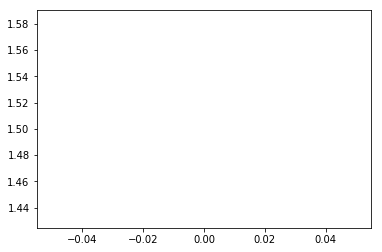

In [87]:
loss_epoch_arr = []
max_epochs=1

n_iters=np.ceil(50000/batch_size)

for epoch in range(max_epochs):
  for i,data in enumerate(trainloader,0):
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    
    opt.zero_grad()
    
    outputs=vgg(inputs)
    loss=loss_fn(outputs,labels)
    loss.backward()
    opt.step()
    
    del inputs,labels,outputs
    torch.cuda.empty_cache()
    
    if i%100 == 0:
      print('Iteration:%d/%d ,Loss=%0.2f'%(i,n_iters,loss.item()))
    
  loss_epoch_arr.append(loss.item())
  print('Epoch:%d/%d Test accuracy=%0.2f Train accuracy=%0.2f'%(epoch,max_epochs,evaluation(testloader,vgg),evaluation(trainloader,vgg)))
  
plt.plot(loss_epoch_arr)
plt.show

# With model copies

In [0]:
# In above result we saw that loss was less for some weights but then again started increasing so final model wasn't perfect but what if we keep a copy of the best model
# that is the weights when loss was least and use it for further training model or use it as final weights
import copy

Min loss 1.00
Iteration:0/3125 ,Loss=1.00
Min loss 0.87
Min loss 0.66
Min loss 0.66
Min loss 0.59
Min loss 0.50
Iteration:100/3125 ,Loss=0.96
Min loss 0.41
Iteration:200/3125 ,Loss=0.71
Iteration:300/3125 ,Loss=0.69
Iteration:400/3125 ,Loss=1.27
Iteration:500/3125 ,Loss=1.39
Iteration:600/3125 ,Loss=0.85
Iteration:700/3125 ,Loss=1.06
Min loss 0.36
Iteration:800/3125 ,Loss=0.69
Iteration:900/3125 ,Loss=1.29
Iteration:1000/3125 ,Loss=1.00
Iteration:1100/3125 ,Loss=1.03
Iteration:1200/3125 ,Loss=1.19
Iteration:1300/3125 ,Loss=0.71
Iteration:1400/3125 ,Loss=0.81
Iteration:1500/3125 ,Loss=1.21
Iteration:1600/3125 ,Loss=0.99
Iteration:1700/3125 ,Loss=0.80
Iteration:1800/3125 ,Loss=1.42
Iteration:1900/3125 ,Loss=0.83
Iteration:2000/3125 ,Loss=0.58
Iteration:2100/3125 ,Loss=1.29
Iteration:2200/3125 ,Loss=1.09
Iteration:2300/3125 ,Loss=1.04
Iteration:2400/3125 ,Loss=0.95
Iteration:2500/3125 ,Loss=0.92
Min loss 0.32
Iteration:2600/3125 ,Loss=0.88
Min loss 0.31
Iteration:2700/3125 ,Loss=1.29
Iter

<function matplotlib.pyplot.show>

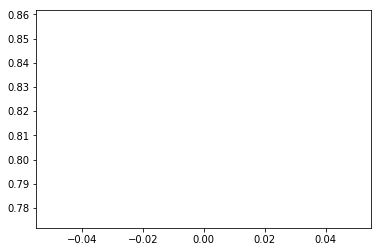

In [90]:
loss_epoch_arr = []
max_epochs=1

min_loss=1000

n_iters=np.ceil(50000/batch_size)

for epoch in range(max_epochs):
  for i,data in enumerate(trainloader,0):
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    
    opt.zero_grad()
    
    outputs=vgg(inputs)
    loss=loss_fn(outputs,labels)
    loss.backward()
    opt.step()
    
    if min_loss>loss.item():
      min_loss=loss.item()
      best_model=copy.deepcopy(vgg.state_dict())
      print('Min loss %0.2f' % min_loss)
      
    del inputs,labels,outputs
    torch.cuda.empty_cache()
    
    if i%100 == 0:
      print('Iteration:%d/%d ,Loss=%0.2f'%(i,n_iters,loss.item()))
    
  loss_epoch_arr.append(loss.item())
  print('Epoch:%d/%d Test accuracy=%0.2f Train accuracy=%0.2f'%(epoch,max_epochs,evaluation(testloader,vgg),evaluation(trainloader,vgg)))
  
plt.plot(loss_epoch_arr)
plt.show

In [91]:
# By this we are putting the best model in our vgg
# Also we can start with these as initial weight and again run the model and update the weights
vgg.load_state_dict(best_model)
print(evaluation(trainloader,vgg),evaluation(testloader,vgg))

62.128 60.08


# ResNet Model

https://pytorch.org/docs/stable/_modules/torchvision/models/resnet.html

In [92]:
resnet=models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 25.6MB/s]


In [93]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
for param in resnet.parameters():
  param.requires_grad=False

In [0]:
# Only the last layer parameters can be trained
in_features=resnet.fc.in_features
resnet.fc=nn.Linear(in_features,num_classes)

In [98]:
for param in resnet.parameters():
  if param.requires_grad:
    print(param.shape)

torch.Size([10, 512])
torch.Size([10])


In [0]:
resnet=resnet.to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(resnet.parameters(),lr=0.01)

Min loss 2.00
Iteration:0/3125 ,Loss=2.00
Min loss 0.96
Min loss 0.67
Min loss 0.65
Min loss 0.54
Iteration:100/3125 ,Loss=0.98
Iteration:200/3125 ,Loss=1.09
Min loss 0.50
Iteration:300/3125 ,Loss=1.33
Iteration:400/3125 ,Loss=1.34
Iteration:500/3125 ,Loss=1.16
Min loss 0.49
Iteration:600/3125 ,Loss=1.54
Min loss 0.46
Iteration:700/3125 ,Loss=1.23
Iteration:800/3125 ,Loss=1.62
Iteration:900/3125 ,Loss=1.17
Iteration:1000/3125 ,Loss=0.69
Iteration:1100/3125 ,Loss=1.15
Iteration:1200/3125 ,Loss=1.29
Iteration:1300/3125 ,Loss=1.48
Min loss 0.40
Iteration:1400/3125 ,Loss=1.28
Iteration:1500/3125 ,Loss=1.16
Iteration:1600/3125 ,Loss=1.15
Iteration:1700/3125 ,Loss=1.36
Iteration:1800/3125 ,Loss=1.56
Iteration:1900/3125 ,Loss=1.54
Iteration:2000/3125 ,Loss=1.47
Iteration:2100/3125 ,Loss=0.52
Iteration:2200/3125 ,Loss=1.13
Iteration:2300/3125 ,Loss=1.29
Iteration:2400/3125 ,Loss=1.27
Iteration:2500/3125 ,Loss=1.25
Iteration:2600/3125 ,Loss=1.45
Iteration:2700/3125 ,Loss=1.50
Iteration:2800/312

<function matplotlib.pyplot.show>

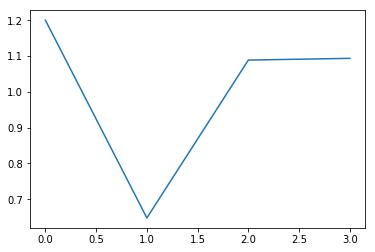

In [104]:
loss_epoch_arr = []
max_epochs=4

min_loss=1000

n_iters=np.ceil(50000/batch_size)

for epoch in range(max_epochs):
  for i,data in enumerate(trainloader,0):
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    
    opt.zero_grad()
    
    outputs=resnet(inputs)
    loss=loss_fn(outputs,labels)
    loss.backward()
    opt.step()
    
    if min_loss>loss.item():
      min_loss=loss.item()
      best_model=copy.deepcopy(resnet.state_dict())
      print('Min loss %0.2f' % min_loss)
      
    del inputs,labels,outputs
    torch.cuda.empty_cache()
    
    if i%100 == 0:
      print('Iteration:%d/%d ,Loss=%0.2f'%(i,n_iters,loss.item()))
    
  loss_epoch_arr.append(loss.item())
  print('Epoch:%d/%d Test accuracy=%0.2f Train accuracy=%0.2f'%(epoch,max_epochs,evaluation(testloader,resnet),evaluation(trainloader,resnet)))
  
plt.plot(loss_epoch_arr)
plt.show

In [105]:
resnet.load_state_dict(best_model)
print(evaluation(trainloader,resnet),evaluation(testloader,resnet))

58.184 57.53


# Inception module

https://pytorch.org/docs/master/_modules/torchvision/models/inception.html

In [106]:
inception=models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/checkpoints/inception_v3_google-1a9a5a14.pth
100%|██████████| 104M/104M [00:02<00:00, 45.7MB/s] 


In [107]:
#In this the main problem of vanishing gradient was identified by microsoft research. To address this the identity blocks were feed back after the updation. The one of 
# Two addition after the google net, Second one is the introduction to auxillary loss.
print(inception)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [0]:
for param in inception.parameters():
  param.requires_grad=False

In [0]:
# Here two layers can be trained so one is the last one and other one is auxillary layer
aux_in_features=inception.AuxLogits.fc.in_features
inception.AuxLogits.fc=nn.Linear(aux_in_features,num_classes)

In [110]:
for param in inception.parameters():
  if param.requires_grad:
    print(param.shape)

torch.Size([10, 768])
torch.Size([10])


In [0]:
in_features=inception.fc.in_features
inception.fc=nn.Linear(in_features,num_classes)

In [112]:
for param in inception.parameters():
  if param.requires_grad:
    print(param.shape)

torch.Size([10, 768])
torch.Size([10])
torch.Size([10, 2048])
torch.Size([10])


In [0]:
transform_train=transforms.Compose([transforms.RandomResizedCrop(299),  # Change the size of image to 299x299 as inception takes this as input
                                  transforms.ToTensor(),               # Converting it to tensor
                                  transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]) # Normalizing the image ,first one is mean and second one is standard deviation

transform_test=transforms.Compose([transforms.RandomResizedCrop(299),
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [114]:
trainset=torchvision.datasets.CIFAR10(root='./data',download=True,train=True,transform=transform_train)
testset=torchvision.datasets.CIFAR10(root='./data',download=True,train=False,transform=transform_test)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
batch_size=16

trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=False)

In [0]:
inception=inception.to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(inception.parameters(),lr=0.01)

In [0]:
def evaluation(dataloader,model):
  total,correct=0,0
  for data in dataloader:
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    outputs,aux_outputs=model(inputs)
    _,pred=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(pred==labels).sum().item()
  return 100*correct/total

Min loss 2.06
Iteration:0/3125 ,Loss=2.06
Min loss 1.79
Min loss 1.56
Min loss 1.32
Min loss 1.02
Iteration:100/3125 ,Loss=1.97
Iteration:200/3125 ,Loss=1.79
Iteration:300/3125 ,Loss=1.88
Iteration:400/3125 ,Loss=1.20
Iteration:500/3125 ,Loss=2.06
Iteration:600/3125 ,Loss=2.00
Min loss 0.92
Iteration:700/3125 ,Loss=2.23
Iteration:800/3125 ,Loss=1.66
Iteration:900/3125 ,Loss=1.95
Iteration:1000/3125 ,Loss=1.52
Iteration:1100/3125 ,Loss=2.06
Iteration:1200/3125 ,Loss=1.82
Iteration:1300/3125 ,Loss=1.39
Iteration:1400/3125 ,Loss=2.20
Iteration:1500/3125 ,Loss=1.50
Iteration:1600/3125 ,Loss=1.91
Iteration:1700/3125 ,Loss=2.58
Iteration:1800/3125 ,Loss=1.87
Iteration:1900/3125 ,Loss=1.76
Iteration:2000/3125 ,Loss=2.48
Iteration:2100/3125 ,Loss=1.85
Iteration:2200/3125 ,Loss=1.60
Iteration:2300/3125 ,Loss=1.28
Iteration:2400/3125 ,Loss=1.70
Iteration:2500/3125 ,Loss=1.79
Iteration:2600/3125 ,Loss=2.61
Iteration:2700/3125 ,Loss=1.83
Iteration:2800/3125 ,Loss=1.85
Iteration:2900/3125 ,Loss=2.2

<function matplotlib.pyplot.show>

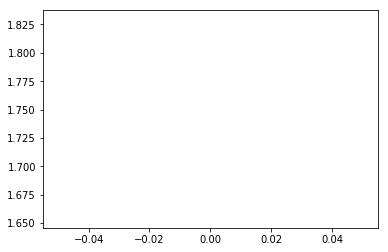

In [119]:
# And here we calculate two losses one is at the last layer and other one at the auxillary layer and then we backpropagate by summation of both but the auxillary layer 
# has less affect that is 30% only and this is the second change in microsoft research
loss_epoch_arr = []
max_epochs=1

min_loss=1000

n_iters=np.ceil(50000/batch_size)

for epoch in range(max_epochs):
  for i,data in enumerate(trainloader,0):
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    
    opt.zero_grad()
    
    outputs,aux_outputs=inception(inputs)
    loss=loss_fn(outputs,labels)+0.3*loss_fn(aux_outputs,labels)
    loss.backward()
    opt.step()
    
    if min_loss>loss.item():
      min_loss=loss.item()
      best_model=copy.deepcopy(inception.state_dict())
      print('Min loss %0.2f' % min_loss)
      
    del inputs,labels,outputs
    torch.cuda.empty_cache()
    
    if i%100 == 0:
      print('Iteration:%d/%d ,Loss=%0.2f'%(i,n_iters,loss.item()))
    
  loss_epoch_arr.append(loss.item())
  print('Epoch:%d/%d Test accuracy=%0.2f Train accuracy=%0.2f'%(epoch,max_epochs,evaluation(testloader,inception),evaluation(trainloader,inception)))
  
plt.plot(loss_epoch_arr)
plt.show

In [120]:
inception.load_state_dict(best_model)
print(evaluation(trainloader,inception),evaluation(testloader,inception))

47.946 47.07
